In [1]:
import os
import pandas as pd

directory_path = r'C:\Users\jos34\OneDrive\바탕 화면\호서대학교 4학년\AI프레임워크 보안\CIC-IDS\MachineLearningCSV\MachineLearningCVE'

file_list = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

dfs = []
for file in file_list:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

main_df = pd.concat(dfs, ignore_index=True)

In [2]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             float64
 1    Flow Duration                float64
 2    Total Fwd Packets            float64
 3    Total Backward Packets       float64
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
label_counts = main_df[' Label'].value_counts()

print("Label의 분포별 정확한 수치:")
print(label_counts)


Label의 분포별 정확한 수치:
 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [5]:
main_df.drop(columns=['H'], inplace=True)
main_df.dropna(subset=['Flow Bytes/s'], inplace=True)

In [6]:
missing_values = main_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("결측값이 있는 열:")
    for col, val in missing_values.items():
        print(f"{col}: {val}")
else:
    print("결측값이 있는 열이 없습니다.")

결측값이 있는 열이 없습니다.


In [7]:
label_counts = main_df[' Label'].value_counts()

print("Label의 분포별 정확한 수치:")
print(label_counts)


Label의 분포별 정확한 수치:
 Label
BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [8]:
main_df[' Label'] = main_df[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

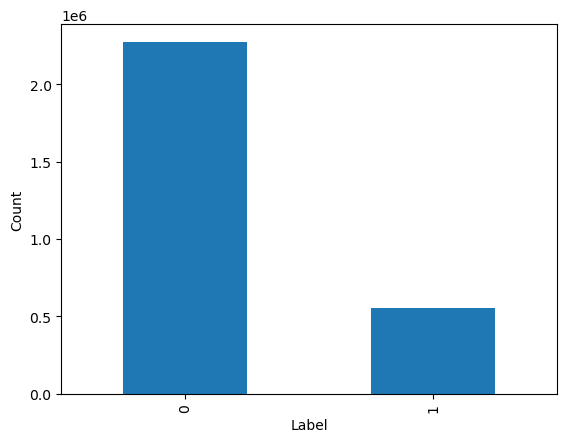

In [12]:
import matplotlib.pyplot as plt

main_df[' Label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [13]:
main_df[' Label'].value_counts()

 Label
0    2272688
1     556697
Name: count, dtype: int64

In [14]:
x_data = main_df.drop([' Label'], axis=1)
y_data = main_df[' Label']

In [15]:
# x_data의 'Flow Bytes/s' 열의 값을 소수점 이하 여섯 자리까지 반올림하여 표시
x_data['Flow Bytes/s'] = x_data['Flow Bytes/s'].round(6)


In [16]:
import pandas as pd
import numpy as np

np.where(np.isinf(x_data))


(array([     65,      65,    1767, ..., 2823496, 2824676, 2824676],
       dtype=int64),
 array([14, 15, 14, ..., 15, 14, 15], dtype=int64))

In [17]:
x_data.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,1.100917e+05,18348.623850,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,2.307692e+05,38461.538460,52.0,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,3.529412e+05,58823.529410,34.0,0.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,54871.0,1022.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,1.174168e+04,1956.947162,1022.0,0.0,1022.0,1022.0,1022.0,1022.0,0.0,1022.0,1022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,1956.947162,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,54925.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,3.000000e+06,500000.000000,4.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,500000.000000,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,54925.0

In [22]:
import numpy as np

# 무한대 값을 찾기
inf_values = np.where(np.isinf(x_data))

# 결과 출력
print("무한대 값이 있는 열:", inf_values[1])


무한대 값이 있는 열: [14 15 14 ... 15 14 15]


In [23]:
# 무한대 값을 가진 열의 인덱스 가져오기
inf_column_indices = np.unique(inf_values[1])

# 각 열의 무한대 값을 출력
for column_index in inf_column_indices:
    column_name = x_data.columns[column_index]
    inf_values_in_column = x_data.loc[np.isinf(x_data.iloc[:, column_index]), column_name]
    print(f"열 '{column_name}'의 무한대 값:\n{inf_values_in_column}")


열 'Flow Bytes/s'의 무한대 값:
65         inf
1767       inf
1890       inf
3375       inf
8057       inf
8405       inf
13313      inf
13716      inf
18253      inf
33330      inf
55551      inf
61529      inf
88091      inf
130668     inf
148284     inf
174379     inf
174394     inf
189925     inf
194128     inf
200349     inf
201237     inf
203979     inf
204238     inf
204640     inf
208999     inf
213594     inf
214432     inf
214453     inf
215026     inf
216496     inf
225993     inf
230750     inf
237227     inf
243055     inf
248216     inf
256218     inf
260649     inf
261754     inf
264197     inf
264238     inf
265317     inf
265321     inf
267379     inf
269794     inf
280386     inf
282312     inf
283722     inf
283856     inf
285959     inf
286021     inf
286030     inf
287244     inf
287512     inf
293087     inf
295164     inf
295859     inf
297141     inf
300515     inf
300518     inf
300724     inf
302417     inf
302693     inf
302922     inf
304945     inf
305962     inf


In [18]:
y_data.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name:  Label, dtype: int64

In [26]:
x_data.head(66)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.000000,3.0,3.0,3.0,3.0,0.000000,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,6.666667e+05,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.000000,6.000000,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,6.0,6.0,0.0,1.100917e+05,1.834862e+04,109.0,0.000000,109.0,109.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9.174312e+03,9174.311927,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.000000,6.000000,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,6.0,6.0,0.0,2.307692e+05,3.846154e+04,52.0,0.000000,52.0,52.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,1.923077e+04,19230.769230,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.000000,6.000000,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,6.0,6.0,6.0,0.0,3.529412e+05,5.882353e+04,34.0,0.000000,34.0,34.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,2.941176e+04,29411.764710,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.000000,6.000000,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.000000,3.0,3.0,3.0,3.0,0.000000,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,6.666667e+05,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.000000,6.000000,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,54871.0,1022.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.0,0.0,1.174168e+04,1.956947e+03,1022.0,0.000000,1022.0,1022.0,1022.0,1022.0,0.000000,1022.0,1022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,1.956947e+03,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.000000,6.000000,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,54925.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.000000,4.0,4.0,4.0,4.0,0.000000,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,5.000000e+05,0.000000,6.0,6.0,6.000000,0.0

In [20]:
from sklearn.model_selection import train_test_split

x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(x_data, y_data, test_size=0.5, random_state=42)
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(x_data, y_data, test_size=0.4, random_state=42)
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [21]:
import xgboost as xgb


params = {
    'booster': 'gbtree',
    'learning_rate': 0.05,
    'max_depth': 12,
    'num_leaves': 63,
    'bagging_freq': 32,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'objective': 'binary:logistic',
    'num_class': 1,
    'eval_metric': 'merror'
}

model = xgb.XGBClassifier(**params)

model.fit(x_train_50, y_train_50)

y_pred = model.predict(x_test_50)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_50, y_pred)
print(f'XGBoost 정확도 : {accuracy}')

report = classification_report(y_test_50, y_pred)
print(report)


XGBoostError: [21:57:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\../data/gradient_index.h:94: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`